# Definir o problema de Negócio

Construir um modelo de IA capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', ''ship, 'truck']. Dada uma nova imagem de uma dessas categorias, o modelo deve ser capaz de classificar e indicar corretamente o que é a imagem.

In [4]:
# Instalando TF
!pip install -q tensorflow==2.12

In [5]:
# Silencia msg TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Carregamento de imagens

In [7]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [8]:
# Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Pré Processamento e visualização das Imagens

In [9]:
# Normaliza os valores dosnpixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [10]:
# Fução para exibir as imagens
def visualiza_imagens(imagens, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imagens[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

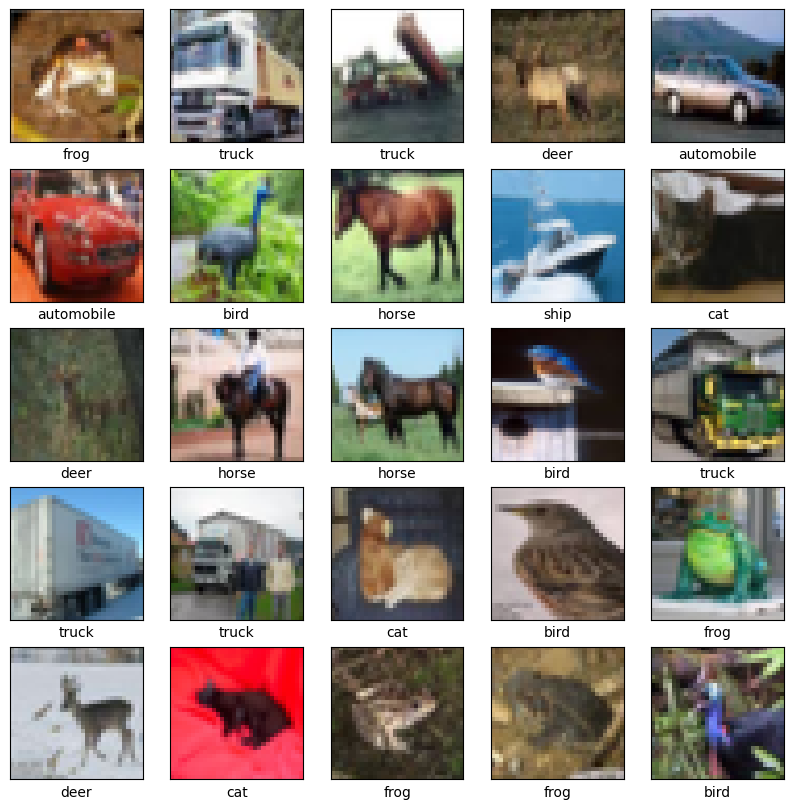

In [11]:
visualiza_imagens(imagens_treino, labels_treino)

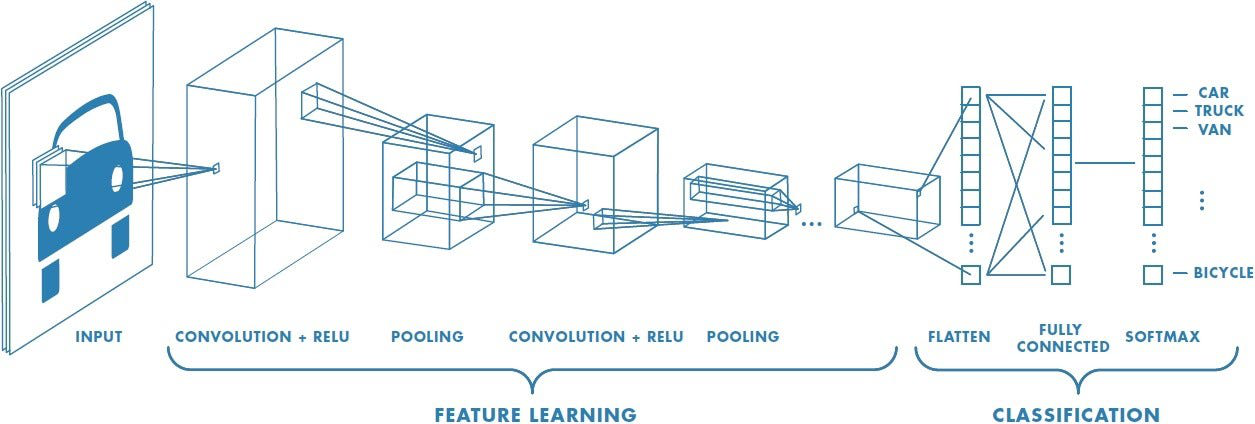

In [24]:
Image.open("imagens/convnet.jpg")

# CONSTRUÇÃO DO MODELO

In [12]:
# Modelo

# Cria o objeto de sequência de camadas - pacote 'models' do keras 
modeloIA = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (Camada de entrada)
modeloIA.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
modeloIA.add(layers.MaxPooling2D((2,2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modeloIA.add(layers.Conv2D(64, (3,3), activation = 'relu'))
modeloIA.add(layers.MaxPooling2D((2,2)))

# Adiciona terceiro bloco de convolução e max pooling (camada intermediária)
modeloIA.add(layers.Conv2D(64, (3,3), activation = 'relu'))
modeloIA.add(layers.MaxPooling2D((2,2)))

In [14]:
# Adiona camadas de classificação
modeloIA.add(layers.Flatten())
modeloIA.add(layers.Dense(64, activation = 'relu'))
modeloIA.add(layers.Dense(10, activation = 'softmax'))

In [16]:
# Sumário do modelo
modeloIA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

### Compilação do modelo

In [18]:
modeloIA.compile(optimizer = 'adam', #otimizador
                loss = 'sparse_categorical_crossentropy', #função de erro / que será otimizada
                metrics = ['accuracy']) #

### Treinamento do modelo

In [19]:
%%time
history = modeloIA.fit(imagens_treino,
                      labels_treino,
                      epochs = 10, # treinar o modelo por 10 partes, ou passadas
                      validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5500 - accuracy: 0.4302 - val_loss: 1.2801 - val_accuracy: 0.5385
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1797 - accuracy: 0.5774 - val_loss: 1.0988 - val_accuracy: 0.6063
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0419 - accuracy: 0.6317 - val_loss: 1.0642 - val_accuracy: 0.6277
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9510 - accuracy: 0.6638 - val_loss: 0.9733 - val_accuracy: 0.6666
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8862 - accuracy: 0.6894 - val_loss: 0.9179 - val_accuracy: 0.6799
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8289 - accuracy: 0.7093 - val_loss: 0.9788 - val_accuracy: 0.6587
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7860 - accuracy: 0.7235 - val_loss: 0.9056 -

### Avaliação do modelo

In [20]:
#Avalia
erro_teste, acc_teste = modeloIA.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 1s - loss: 0.8898 - accuracy: 0.6981 - 1s/epoch - 4ms/step


In [21]:
print(f"Acurácia com Dados de Teste: {acc_teste}")

Acurácia com Dados de Teste: 0.6980999708175659


### Deploy do Modelo

In [41]:
#Carrega nova imagem
nova_imagem = Image.open("dados/cavalim.jpg")

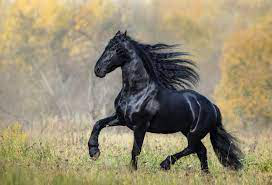

In [42]:
nova_imagem

In [43]:
# Dimensões da imagem (em pixels)

In [44]:
nova_imagem.size

(272, 185)

In [45]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32,32))

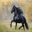

In [46]:
nova_imagem

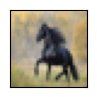

In [47]:
# Exibir imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [48]:
# Converte a imagem para array numpy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [49]:
# Expande a dimensão do array para que ele tenha formato (1,32,32,3) - 1 array 32x32 e 3 camadas de cores
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)


In [50]:
# Previsões
previsoes = modeloIA.predict(nova_imagem_array)

1/1 [==============================] - 0s 19ms/step


In [51]:
print(previsoes) #uma possibilidade para cada tipo de classe usada no treinamento

[[5.84743591e-03 2.26721786e-05 1.43671418e-02 1.19273346e-02
  1.57299824e-02 1.02056734e-01 1.45435901e-04 8.49446237e-01
  1.59714386e-04 2.97274906e-04]]


In [52]:
# Obtém a classe com maior probabilidade e o nome dela
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [53]:
print(f"A nova imagem foi classificada como: {nome_classe_prevista}")

A nova imagem foi classificada como: horse
